In [358]:
%reset -f
import sys
sys.path.insert(0, '..')
from wavhandler import *
import numpy as np
import matplotlib.pyplot as plt

In [359]:
data = Dataset('Pcfruit_swd_mel')

In [360]:
data.read(data='all', setting='psd')
data.make_array(setting='raw');

Species: all.
Read 3469 filenames in 0.01 seconds.
Loaded data into matrix in 23.31 seconds.


0.2465908558341137


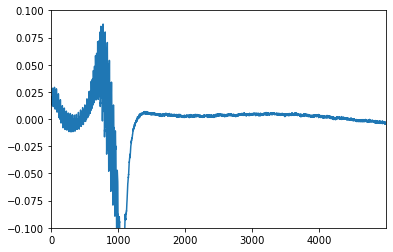

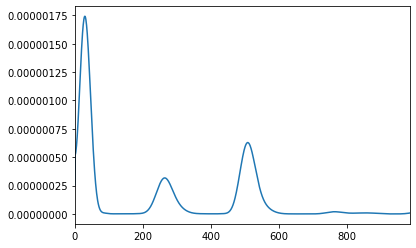

In [361]:
rdm = np.random.randint(0, data.X.shape[0])

# early = data.psd.iloc[rdm, 0:150].median()
# late = data.psd.iloc[rdm, 180:300].median()

import scipy.integrate as it
early = it.cumtrapz(data.psd.iloc[rdm, :100],initial=0)[-1]
late = it.cumtrapz(data.psd.iloc[rdm, 200:300],initial=0)[-1]
print(late/early)

plt.figure()
data.raw.iloc[rdm].plot(ylim=(-.1,.1))
plt.figure()
data.psd.iloc[rdm].plot()

In [362]:
import scipy.integrate as it

c=0
for i in range(data.raw.shape[0]):
    early = it.cumtrapz(data.psd.iloc[i, :100])[-1]
    late = it.cumtrapz(data.psd.iloc[i, 200:300])[-1]
    metric = late/early 
    if metric > 0.109:
        c += 1

In [363]:
c

1328